In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random

In [2]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
title=[]
artist=[]


title_list=soup.select("p.title-artist cite.title")
artist_list=soup.select("p.title-artist em.artist")

num_iter = len(soup.select("p.title-artist"))

for i in range(num_iter):
    title.append(title_list[i].get_text())
    artist.append(artist_list[i].get_text())

In [6]:
hot_songs = pd.DataFrame({"title":title,
                       "artist":artist})

In [ ]:
hot_songs.head()

In [7]:
hot_songs['title'] = hot_songs['title'].str.lower()
hot_songs['artist'] = hot_songs['artist'].str.lower()

In [8]:
# the function is taken from: https://albertoviciana.medium.com/my-first-song-recommender-96994af6d6bc


def hot():
    random_song=random.choice(hot_songs['title'])
    user_input = input ('Choose a song you like:')
    
    if user_input.lower() not in list(hot_songs['title']):
        print("Sorry, I have no recommendation")
    else:
        print("If you like the song " + "'" + user_input + "'" + " then listen to this next: " + "'" + random_song + "'")        

In [ ]:
hot()

In [ ]:
hot()

In [78]:
hot_songs.to_csv('top100.csv')

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [10]:
secrets_file = open("secrets.txt","r")

In [11]:
string = secrets_file.read()

In [ ]:
string

In [ ]:
string.split('\n')

In [13]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [ ]:
secrets_dict

In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [16]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [17]:
all_tracks = get_playlist_tracks("1G8IpkZKobrIlXcVPoSIuf")
len(all_tracks)

10000

In [18]:
all_tracks[0]['track']['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
 'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
 'id': '74ASZWbe4lXaubB36ztrGX',
 'name': 'Bob Dylan',
 'type': 'artist',
 'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}

In [19]:
all_tracks[0]['track']['artists'][0]['name']

'Bob Dylan'

In [20]:
all_tracks[0]['track']['name']

'Like a Rolling Stone'

In [21]:
all_tracks[0]['track']['uri']

'spotify:track:3AhXZa8sUQht0UEdBJgpGc'

In [22]:
all_tracks[0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [23]:
all_tracks[0]['track']['uri']

'spotify:track:3AhXZa8sUQht0UEdBJgpGc'

In [35]:
song_name = []
artist_name = []
track_uri = []

for i in range(len(all_tracks)):
    try:
        song = all_tracks[i]['track']['name']
        artist = all_tracks[i]["track"]["album"]['artists'][0]['name']
        uri = all_tracks[i]['track']['uri']
        
        artist_name.append(artist)
        song_name.append(song)
        track_uri.append(uri)
    except:
        artist_name.append('none')
        song_name.append('none')
        track_uri.append('none')

In [36]:
spotify_df = pd.DataFrame({'song' : song_name,
                          'artist': artist_name,
                          'uri': track_uri})

In [37]:
spotify_df.head()

,song,artist,uri
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK


In [38]:
spotify_df.song.value_counts() # 53 songs have no name

none                    53
Summertime               6
Girlfriend               4
Crazy                    4
Fire                     4
                        ..
Young Adult Friction     1
The Pusher               1
If You Leave Me Now      1
Worried Life Blues       1
Come Dancing             1
Name: song, Length: 9641, dtype: int64

In [39]:
spotify_df = spotify_df[spotify_df.song != 'none'] # removing all the rows that have 'none'

In [40]:
spotify_df.shape

(9947, 3)

In [41]:
# since we removed all the values that had 'none' we need to reset index

spotify_df.reset_index(inplace=True)  

In [43]:
spotify_df.drop('index', axis=1, inplace=True) # drop extra index column created after reset_index

In [44]:
spotify_df.head()

,song,artist,uri
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK


In [45]:
sp.audio_features(track_uri[1])

[{'danceability': 0.485,
  'energy': 0.863,
  'key': 1,
  'loudness': -9.027,
  'mode': 1,
  'speechiness': 0.0495,
  'acousticness': 1.22e-05,
  'instrumentalness': 0.0162,
  'liveness': 0.138,
  'valence': 0.767,
  'tempo': 116.835,
  'type': 'audio_features',
  'id': '3oTlkzk1OtrhH8wBAduVEi',
  'uri': 'spotify:track:3oTlkzk1OtrhH8wBAduVEi',
  'track_href': 'https://api.spotify.com/v1/tracks/3oTlkzk1OtrhH8wBAduVEi',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3oTlkzk1OtrhH8wBAduVEi',
  'duration_ms': 300977,
  'time_signature': 4}]

In [47]:
audio_features = []
counter = 0  # setting a counter so that we can stop the code for 10 seconds when counter is 100

for item in playlist_uri:
    features = sp.audio_features(item)
    audio_features.append(features)

    counter = counter + 1
    
    if counter % 100 == 0:
        sleep(10)

Expected id of type track but found type Cop+Killer spotify:local:Body+Count:Not+Available+on+Spotify:Cop+Killer:0
Expected id of type track but found type A+Roller+Skating+Jam+Named+%27Saturdays%27 spotify:local:De+La+Soul+feat.+Q-Tip:Not+Available+on+Spotify:A+Roller+Skating+Jam+Named+%27Saturdays%27:0
Expected id of type track but found type Peach%2C+Plum%2C+Pear spotify:local:Joanna+Newsom:Not+Available+on+Spotify:Peach%2C+Plum%2C+Pear:0
Expected id of type track but found type A+Stroke+of+Genius spotify:local:Freelance+Hellraiser:Not+Available+on+Spotify:A+Stroke+of+Genius:0
Expected id of type track but found type Why+They+Hide+Their+Bodies+Under+My+Garage%3F spotify:local:Blawan:Not+Available+on+Spotify:Why+They+Hide+Their+Bodies+Under+My+Garage%3F:0
Expected id of type track but found type Take+Me+Out+to+the+Ball+Game spotify:local:The+Haydn+Quartet:Not+Available+on+Spotify:Take+Me+Out+to+the+Ball+Game:0
Expected id of type track but found type Eye+Know spotify:local:De+La+Soul

In [48]:
[None] in audio_features # some of the audiofeatures have [None] because there was no trackuri

True

In [49]:
danceability = []
energy = []
loudness = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []

In [50]:
for i in range(len(audio_features)):
    #making sure we only run the for loop when it is not [None]
    if audio_features[i] != [None]:  
        danceability.append(audio_features[i][0]['danceability'])
        energy.append(audio_features[i][0]['energy'])
        loudness.append(audio_features[i][0]['loudness'])
        speechiness.append(audio_features[i][0]['speechiness'])
        acousticness.append(audio_features[i][0]['acousticness'])
        instrumentalness.append(audio_features[i][0]['instrumentalness'])
        liveness.append(audio_features[i][0]['liveness'])
        valence.append(audio_features[i][0]['valence'])
        tempo.append(audio_features[i][0]['tempo'])

In [51]:
spotify_af = pd.DataFrame({'danceability' : danceability,
                          'energy': energy,
                          'loudness': loudness,
                          'speechiness': speechiness,
                           'acousticness': acousticness,
                           'instrumentalness': instrumentalness,
                           'liveness': liveness,
                           'valence': valence,
                           'tempo': tempo
                          })

In [52]:
spotify_df

,song,artist,uri
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK
...,...,...,...
9942,Into The Valley,Skids,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW
9943,Tonight's Da Night,Redman,spotify:track:49XnDVsYOHgV4gFZeCojKj
9944,Figure 8,FKA twigs,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q
9945,Like An Angel,The Mighty Lemon Drops,spotify:track:0ya0JYEFoXNviB8RMeHDtW


In [53]:
spotify_final = pd.concat([spotify_df, spotify_af], axis=1)

In [54]:
spotify_final.to_csv('spotify_final.csv')

In [55]:
#reading the saved file again in order to start clustering
data = pd.read_csv('spotify_final.csv')
data.head()

,Unnamed: 0,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429


In [56]:
data = data.drop("Unnamed: 0",axis=1)

In [57]:
data.head()

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429


In [58]:
#making a dataframe with just features
audio_features = data[['danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 
                      'valence', 'tempo']]

In [59]:
audio_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429


In [74]:
from sklearn.preprocessing import StandardScaler
#Fit - Need to save this in pickle
scaler = StandardScaler().fit(audio_features)
#fit and transform audio_features 
X_prep = StandardScaler().fit_transform(audio_features)

#Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=audio_features.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.500878,0.446001,0.611835,-0.520039,1.305379,-0.442775,-0.003656,-0.080977,-0.932486
1,-0.482882,1.053597,0.045086,-0.287487,-0.945406,-0.375215,-0.335143,0.772128,-0.160906
2,-1.208686,-0.683614,-1.285012,-0.046917,-0.052504,-0.442333,4.760657,-1.632817,1.498140
3,-1.004741,-0.871883,-0.448876,-0.430493,-0.692341,-0.442669,-0.652981,-0.999081,0.437808
4,-0.284936,0.595761,-0.427377,0.273844,1.317696,-0.442516,0.828311,1.588672,1.612955


In [75]:
import pickle

#saving the scaler for song reccomender
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

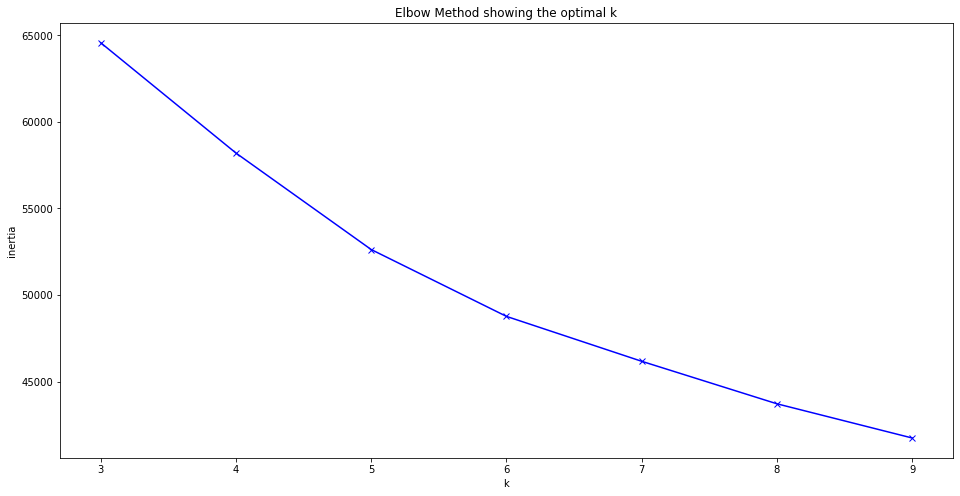

In [64]:
from sklearn.cluster import KMeans
import numpy as np

K = range(3, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

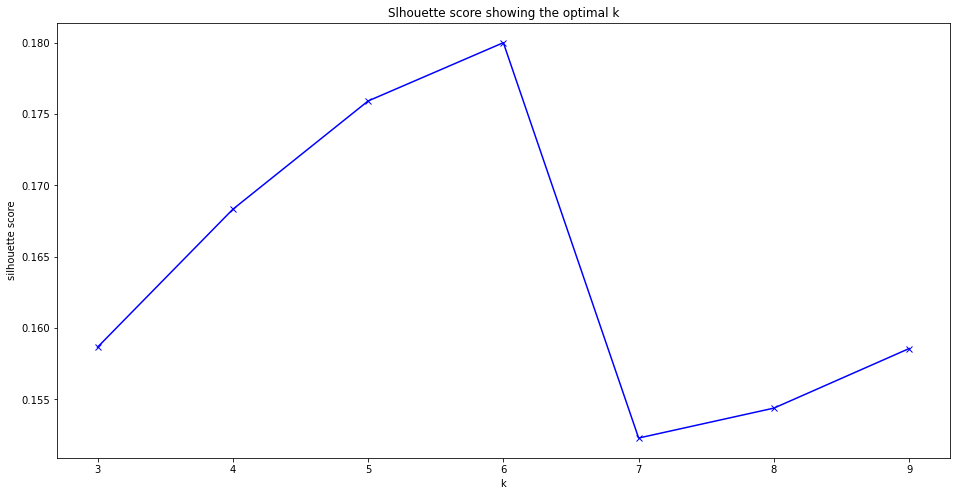

In [65]:
from sklearn.metrics import silhouette_score

K = range(3, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
# optimal k looks like 6

In [76]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
#Saving the model
pickle.dump(kmeans, open('model.pkl', 'wb'))

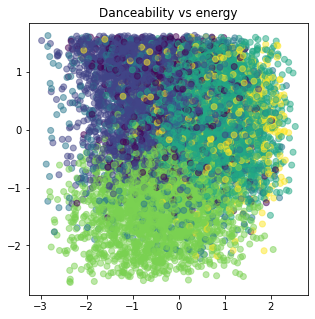

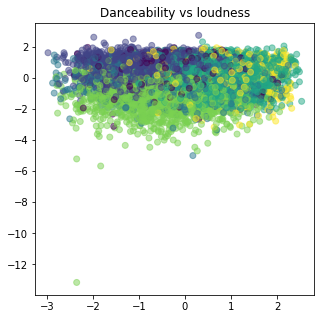

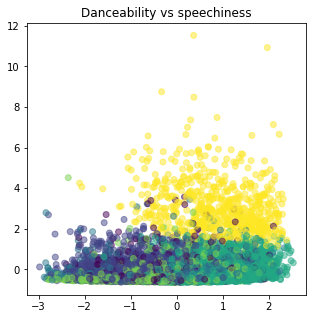

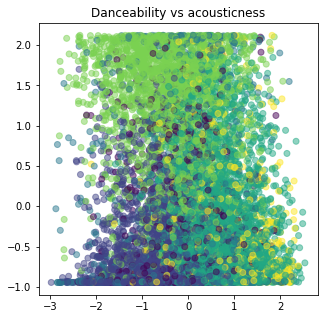

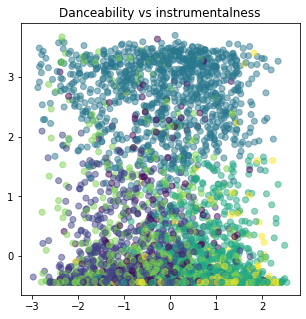

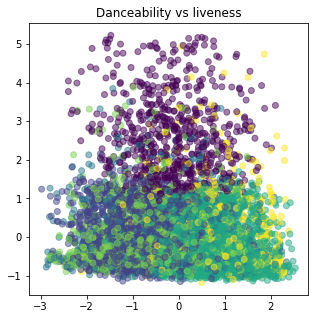

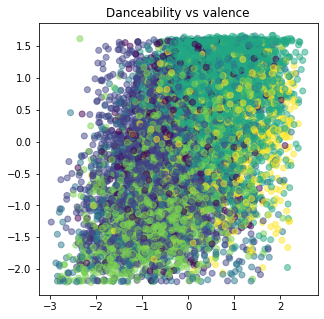

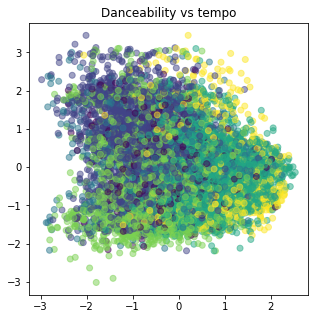

In [67]:
#loop for plotting first(0) column with all the rest starting from energy
for i in range(1,len(audio_features.columns)):    
    plt.figure(figsize=(5, 5))
    plt.scatter(X_prep[:, 0], X_prep[:, i], c=clusters,alpha=0.5)
    plt.title(f'Danceability vs {audio_features.columns[i]}')
    plt.show()

In [68]:
data['cluster'] = clusters

In [69]:
data.head()

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263,3
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835,3
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219,0
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574,1
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429,3


In [77]:
data.to_csv('clustered_df.csv')